In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import entropy
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [2]:
#read csv
df_data = pd.read_csv('sizes3(with class label).csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [3]:
df_data.head()

,x,y,class
0,9.28531,14.58790,0
1,12.39770,8.44890,0
2,8.73624,11.68030,0
3,9.10197,12.83270,0
4,12.29480,8.67373,0


In [4]:
df_data['class'].value_counts()

class
0    667
1    111
2    111
3    111
Name: count, dtype: int64

In [5]:
df = df_data.copy().drop(['class'],axis=1)
X = df.values
y = df_data['class'].values

df.describe()

,x,y
count,1000.000000,1000.000000
mean,7.962190,7.639256
std,4.547997,4.641045
min,-5.681400,-6.073150
25%,6.388598,6.039690
50%,9.432605,9.067995
75%,11.199375,10.813200
max,15.953900,16.662500


In [6]:
#k-means
startTime = time.time()

km = KMeans(n_clusters=4, n_init='auto',random_state =4)
km.fit(X)
y_pred = km.predict(X)

time_con = time.time()-startTime
print('-----time consumption-----')
print('%0.3f seconds'%time_con)

-----time consumption-----
0.143 seconds


C:\Users\CY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [7]:
#k menas SSE
sse_km = km.inertia_
print('-----SSE-----')
print('%0.3f'%sse_km)

-----SSE-----
8341.253


In [8]:
#k means accuracy
label_km = km.labels_

conf_matrix = confusion_matrix(y, label_km)
print('conf_matrix')
print(conf_matrix)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

map_label = np.zeros_like(label_km)
for i, j in zip(row_ind, col_ind):
    map_label[label_km == j] = i
accuracy_km = accuracy_score(y, map_label)
print('accuracy: %0.3f'%accuracy_km)

conf_matrix
[[  0   8 649  10]
 [  0   0   0 111]
 [  0 111   0   0]
 [109   0   0   2]]
accuracy: 0.980


In [9]:
# k means entropy
conf_matrix_km = confusion_matrix(y, label_km)
prob_conf_matrix_km = conf_matrix_km / conf_matrix_km.sum(axis=0,keepdims=True)
entropies_km = entropy(prob_conf_matrix_km.T, axis=1,base=2)
print('conf_matrix')
print(conf_matrix_km)
print('each entorpy')
print(entropies_km)
overall_entropy_km = np.sum(entropies_km * (np.sum(conf_matrix_km, axis=0) / len(y)))
print(f"Overall Clustering Entropy: {overall_entropy_km:.4f}")

conf_matrix
[[  0   8 649  10]
 [  0   0   0 111]
 [  0 111   0   0]
 [109   0   0   2]]
each entorpy
[0.         0.35548868 0.         0.52463286]
Overall Clustering Entropy: 0.1068


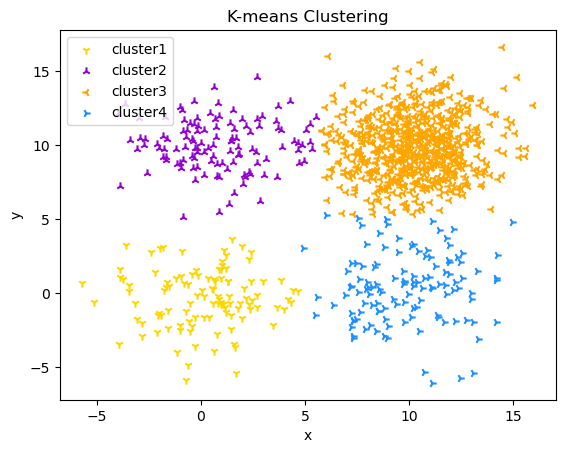

In [10]:
#plot
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')
markers = ['1','2','3','4']
colormap = ['gold','darkviolet','orange','dodgerblue']
labelmap = ['cluster1','cluster2','cluster3','cluster4']
for i,label in enumerate(np.unique(y_pred)):
    cluster_mask = (y_pred== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

In [11]:
#heirarchical clustering
startTime = time.time()

cls = AgglomerativeClustering(n_clusters=4,linkage='ward')
y_pred_cls = cls.fit_predict(X)

time_con = time.time()-startTime
print('-----time consumption-----')
print('%0.3f seconds'%time_con)

-----time consumption-----
0.019 seconds


In [12]:
#heirarchical clustering
centroids =[]
for i in range (4):
    cluster_points = X[y_pred_cls == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

sse_h = 0
for i, centroid in enumerate(centroids):
    cluster_points = X[y_pred_cls == i]
    cluster_sse = np.sum((cluster_points - centroid) ** 2)
    sse_h += cluster_sse
print('-----SSE-----')
print('%0.3f'%sse_h)

-----SSE-----
8562.903


In [13]:
#heirarchical clustering accuracy
label_cls = y_pred_cls

conf_matrix = confusion_matrix(y, label_cls)
print('conf_matrix')
print(conf_matrix)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

map_label_cls = np.zeros_like(label_cls)
for i, j in zip(row_ind, col_ind):
    map_label_cls[label_cls == j] = i
accuracy_h = accuracy_score(y, map_label_cls)
print('accuracy: %0.3f'%accuracy_h)

conf_matrix
[[662   0   1   4]
 [  0   2   0 109]
 [  5   1 105   0]
 [  1 110   0   0]]
accuracy: 0.986


In [14]:
#heirarchical clustering entropy
conf_matrix_cls = confusion_matrix(y, label_cls)
prob_conf_matrix_cls = conf_matrix_cls / conf_matrix_cls.sum(axis=0,keepdims=True)
entropies_cls = entropy(prob_conf_matrix_cls.T, axis=1,base=2)
print('conf_matrix')
print(conf_matrix_cls)
print('each entropy')
print(entropies_cls)
overall_entropy_cls = np.sum(entropies_cls * (np.sum(conf_matrix_cls, axis=0) / len(y)))
print(f"Overall Clustering Entropy: {overall_entropy_cls:.4f}")

conf_matrix
[[662   0   1   4]
 [  0   2   0 109]
 [  5   1 105   0]
 [  1 110   0   0]]
each entropy
[0.07980504 0.20115623 0.07701688 0.22077992]
Overall Clustering Entropy: 0.1092


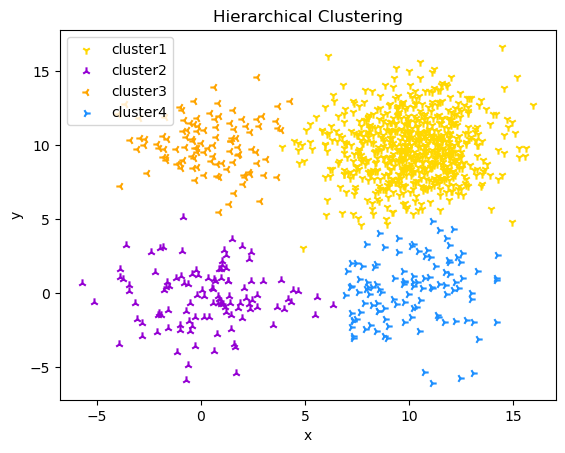

In [15]:
#plot
plt.title('Hierarchical Clustering')
plt.xlabel('x')
plt.ylabel('y')
markers = ['1','2','3','4']
colormap = ['gold','darkviolet','orange','dodgerblue']
labelmap = ['cluster1','cluster2','cluster3','cluster4']
for i,label in enumerate(np.unique(y_pred_cls)):
    cluster_mask = (y_pred_cls== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

In [16]:
# DBSCAN
startTime = time.time()

dbscan = DBSCAN(eps=1.1, min_samples=7)
y_pred_db = dbscan.fit_predict(X)

time_con = time.time()-startTime
print('-----time consumption-----')
print('%0.3f seconds'%time_con)

-----time consumption-----
0.007 seconds


In [17]:
#DBSCAN SSE
centroids_db =[]
for i in range (5):
    cluster_points_db = X[y_pred_db == i]
    centroid_db = np.mean(cluster_points_db, axis=0)
    centroids_db.append(centroid_db)

sse_db = 0
for i, centroid in enumerate(centroids_db):
    cluster_points_db = X[y_pred_db == i]
    dbscan_sse = np.sum((cluster_points_db - centroid) ** 2)
    sse_db += dbscan_sse
print('-----SSE-----')
print('%0.3f'%sse_db)

-----SSE-----
6868.901


C:\Users\CY\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\CY\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [18]:
#DBSCAN accuracy
label_db = y_pred_db
conf_matrix = confusion_matrix(y, label_db)
print('conf_matrix')
print(conf_matrix)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

map_label_db = np.zeros_like(label_db)
for i, j in zip(row_ind, col_ind):
    map_label_db[label_db == j] = i
accuracy_db = accuracy_score(y, map_label_db)
print('accuracy: %0.3f'%accuracy_db)

conf_matrix
[[  0   0   0   0   0]
 [ 13 654   0   0   0]
 [ 18   3  90   0   0]
 [ 13   5   0  93   0]
 [ 34   0   0   0  77]]
accuracy: 0.927


In [19]:
#DBSCAN entropy
conf_matrix_db = confusion_matrix(y, label_db)
prob_conf_matrix_db = conf_matrix_db / conf_matrix_db.sum(axis=0,keepdims=True)
entropies_db = entropy(prob_conf_matrix_db.T, axis=1,base=2)
print('conf_matrix')
print(conf_matrix_db)
print('each entropy')
print(entropies_db)
overall_entropy_db = np.sum(entropies_db * (np.sum(conf_matrix_db, axis=0) / len(y)))
print(f"Overall Clustering Entropy: {overall_entropy_db:.4f}")

conf_matrix
[[  0   0   0   0   0]
 [ 13 654   0   0   0]
 [ 18   3  90   0   0]
 [ 13   5   0  93   0]
 [ 34   0   0   0  77]]
each entropy
[1.87201992 0.10584972 0.         0.         0.        ]
Overall Clustering Entropy: 0.2161


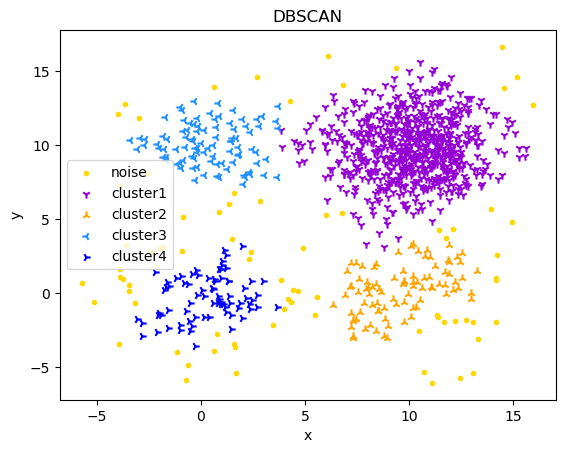

In [20]:
#plot
plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
markers = ['.','1','2','3','4','+']
colormap = ['gold','darkviolet','orange','dodgerblue','b','r']
labelmap = ['noise','cluster1','cluster2','cluster3','cluster4','cluster5']
for i,label in enumerate(np.unique(y_pred_db)):
    cluster_mask = (y_pred_db== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

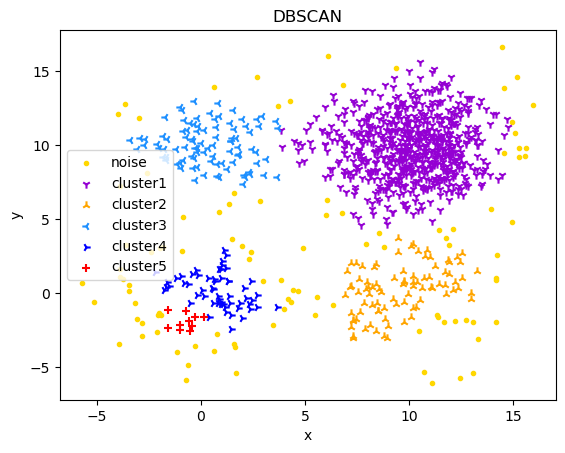

In [21]:
#change eps
dbscan2 = DBSCAN(eps=1.0, min_samples=7)
y_pred_db2 = dbscan2.fit_predict(X)

plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
markers = ['.','1','2','3','4','+']
colormap = ['gold','darkviolet','orange','dodgerblue','b','r']
labelmap = ['noise','cluster1','cluster2','cluster3','cluster4','cluster5']
for i,label in enumerate(np.unique(y_pred_db2)):
    cluster_mask = (y_pred_db2== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()

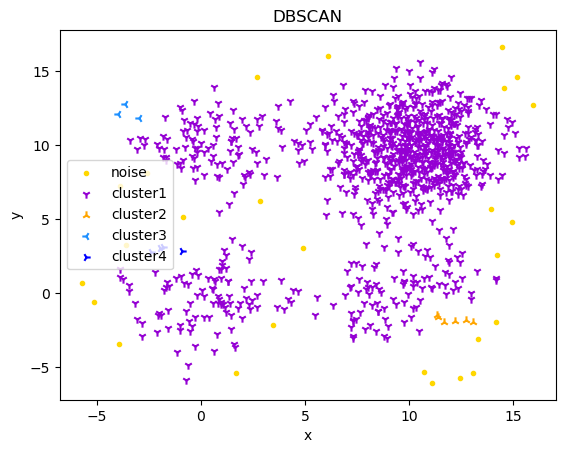

In [22]:
#change min_sample
dbscan3 = DBSCAN(eps=1.1, min_samples=3)
y_pred_db3 = dbscan3.fit_predict(X)

plt.title('DBSCAN')
plt.xlabel('x')
plt.ylabel('y')
markers = ['.','1','2','3','4','+']
colormap = ['gold','darkviolet','orange','dodgerblue','b','r']
labelmap = ['noise','cluster1','cluster2','cluster3','cluster4','cluster5']
for i,label in enumerate(np.unique(y_pred_db3)):
    cluster_mask = (y_pred_db3== label)
    plt.scatter(X[:,0][cluster_mask],X[:,1][cluster_mask],
                c=colormap[i], marker=markers[i],label=labelmap[i])
plt.legend()
plt.show()